<a href="https://colab.research.google.com/github/jorgelum/EQ/blob/main/Gekko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal de São Paulo**

Autor: Jorge Luiz Mendes


## Introdução

[Gekko](https://gekko.readthedocs.io/en/latest/index.html?highlight=doi#) é uma biblioteca de otimização em Python projetada para resolver uma variedade de problemas matemáticos complexos. Com foco em otimização linear, não linear e dinâmica, o Gekko oferece uma interface simples para modelar e resolver problemas de programação matemática.
Este é um pequeno tutorial para resolver problemas relacionados a engenharia química.

## Bibliotecas

In [1]:
pip install gekko #instalação

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 26.1 MB/s eta 0:00:00


In [2]:
import numpy as np
from gekko import GEKKO,chemical
import matplotlib.pyplot as plt # gráficos

## Sistema de Equações Lineares

\begin{equation}
  \ 2x + y + 2z  = 10 \\
\end{equation}

\begin{equation}
  \ x + 4z  = 13 \\
\end{equation}

\begin{equation}
  \ 4x + 2y + z  = 11 \\
\end{equation}

In [ ]:
# Criando um modelo
m = GEKKO()

#Definindo variáveis
x = m.Var()
y = m.Var()
z = m.Var()

#Definindo as equações lineares
m.Equations([2*x + y + 2*z == 10,
             x  + 4*z == 13,
             4*x + 2*y + z == 11])

# Resolvendo
m.solve(disp = False)
# Resultados
print(f'x = {x.value}, y ={y.value}, z = {z.value}')

x = [1.0], y =[2.0], z = [3.0] 


## Sistemas de Equações Não Lineares

\begin{equation}
  \ -x_1^{2} + 2x_2^{2} =4   
\end{equation}

\begin{equation}
  \ 2x_1^{2} -x_2 = 1
\end{equation}

In [ ]:
# Criando um modelo
m = GEKKO()

#Definindo variáveis
x1,x2 = [m.Var() for i in range(2)]

#estimativa inicial
x1.value = -1
x2.value = 1

#Definindo as equações não lineares
m.Equations([-x1**2 + 2*x2**2==4, 2*x1**2 - x2==1])

# Resolvendo
m.solve(disp = False)
# Resultados
print(f'x1 = {x1.value}  e x2 = {x2.value} ')

x1 = [-1.1467779483]  e x2 = [1.6301993241] 


## Otimização Linear


Maximize a função objetivo:
\begin{equation}
  \ FO =  150x_1 + 175x_2
\end{equation}

Restrições:

\begin{equation}
  \  7x_1 + 11x_2 ≼ 77 \\
\end{equation}

\begin{equation}
  \  10x_1 + 8x_2 ≼ 80 \\
\end{equation}
\begin{equation}
  \ 0 ≼ x_1 ≼ 9 \\
\end{equation}
\begin{equation}
  \ 0 ≼ x_2 ≼ 6 \
\end{equation}



In [ ]:
# Criando um modelo
m = GEKKO()

# Definindo as variáveis
x1,x2 = [m.Var() for i in range(2)]

# limite superior
x1.upper = 9
x2.upper = 6
# limite inferior
x1.lower = 0
x2.lower = 0

#Definindo as equações
m.Equations([7*x1 + 11*x2 <= 77, 10*x1 + 8*x2 <= 80])

#Definindo a equação a ser maximizada
m.Maximize(150*x1 + 175*x2)


m.solve(disp = False)

print(f'x1: {x1.value} , x2:{x2.value} e FO: {-m.options.OBJFCNVAL} ')



x1: [4.8888888893] , x2:[3.8888888893] e FO: 1413.888889 


In [ ]:
type(x1.value)

gekko.gk_operators.GK_Value

## Sistema de Equações Diferenciais (EDO's)

Este é um problema de mistura envolvendo um sistema de dois tanques:
\begin{equation}
  \frac{dm_A}{dt} =-0,08m_A + 0,02m_B
\end{equation}

\begin{equation}
  \frac{dm_B}{dt} = 0,08m_A - 0,01m_B
\end{equation}

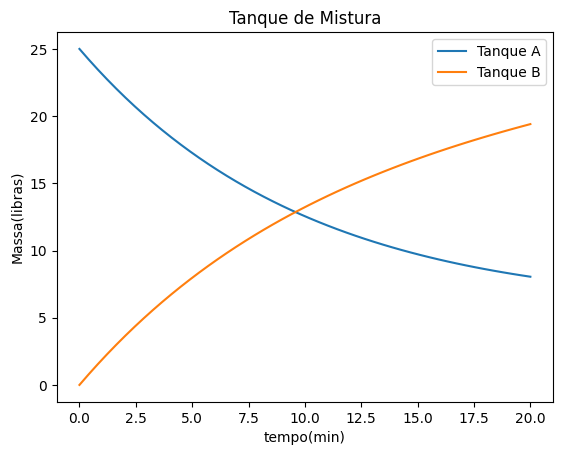

In [ ]:
# Criando um modelo
m = GEKKO()

#Definindo variáveis e estabelecendo o valor inicial
ma = m.Var(25.0)
mb = m.Var(0.0)

#Definindo as equações diferenciais
m.Equation(ma.dt()==-0.08*ma+0.02*mb)
m.Equation(mb.dt()== 0.08*ma - 0.01*mb)

#Definindo o intervalo de tempo
m.time = np.linspace(0,20)

#Estabelecendo o tipo de resolução desse sistema dinâmico
# IMODE = 4 (resolução simultânea)
m.options.IMODE = 4

# Resolvendo
m.solve(disp=False)

# Plotando os resultados
plt.plot(m.time,ma,label='Tanque A')
plt.plot(m.time,mb,label='Tanque B')
plt.title('Tanque de Mistura')
plt.xlabel('tempo(min)')
plt.ylabel('Massa(libras)')
plt.legend(loc='best')
plt.show()


## Sistema de Equações Algébrico Diferenciais (DAE's)

Sistema de dois tanques com equacionamento com índice diferencial igual a 1:

\begin{equation}
    \frac{dV_A}{dt} = F_1 - 20(0,8 - 3h_A)
\end{equation}

\begin{equation}
    \frac{dV_B}{dt} = F_2 + 20(0,8 - 3h_A) - 30(1,1 + 0,2_B)
\end{equation}

\begin{equation}
    \frac{dV_A}{dt} = \frac{dh_A}{dt}
\end{equation}

\begin{equation}
    \ V_B = 5 h_B
\end{equation}

\begin{equation}
    \frac{dh_A}{dt} = 0,4e^{-0,2t}
\end{equation}

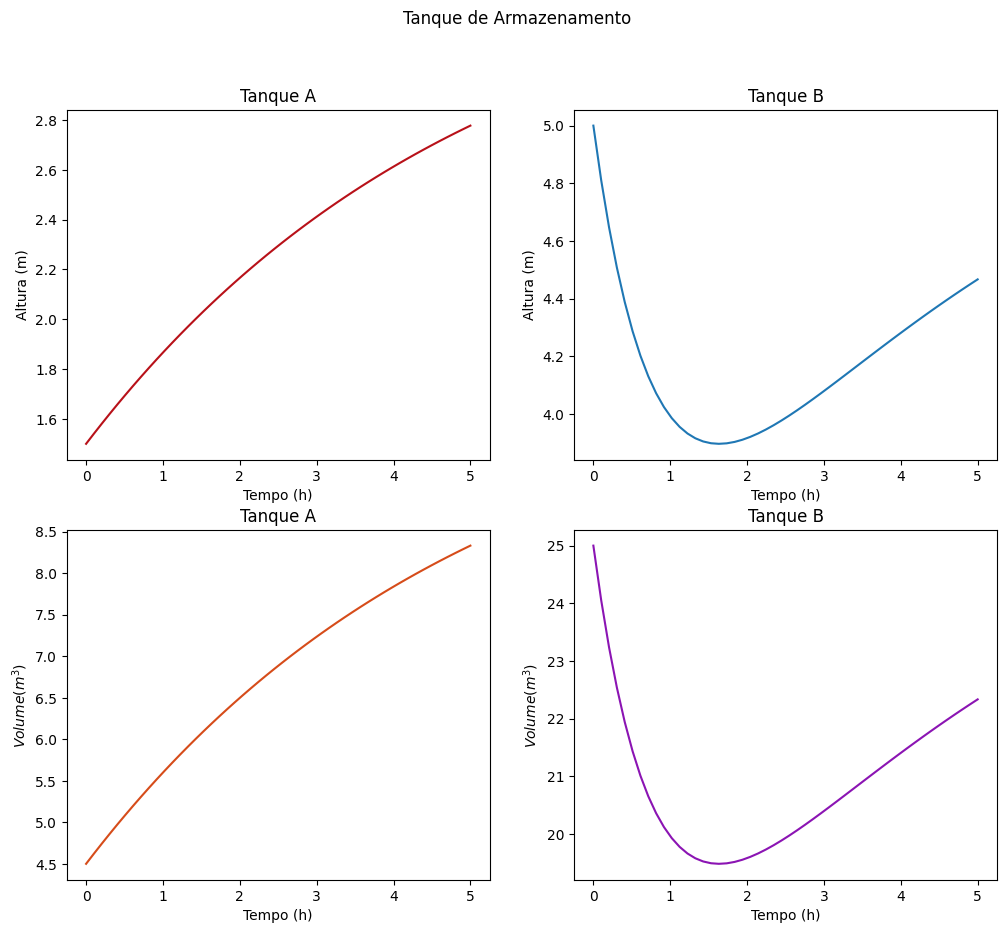

In [8]:
# Criando um modelo
m = GEKKO()

#Definindo variáveis e estabelecendo o valor inicial
Va = m.Var(value = 4.5)
Vb = m.Var(value = 25)

F1 = m.Var(value = 26.1)
F2 =  28 #Constante

hA = m.Var(value = 1.5)
hB = m.Var(value = 5)

Va.dt().value = 1.2
hA.dt().value = 0.4

#Definindo um intervalo de tempo
m.time = np.linspace(0,5)
t = m.Param(value=m.time)

#Definindo as equações
m.Equations([Va.dt()==F1 -20*0.8 -20*0.3*hA,
             Vb.dt()==F2  + 20*0.8  + 20*0.3*hA -30*1.1 -30*0.2*hB,
             Vb == 5*hB,
             Va.dt()==3*hA.dt(),
             hA.dt()== 0.4*m.exp(-0.2*t)])

m.options.IMODE=4
m.options.NODES=3
m.solve(disp=False)


fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.suptitle('Tanque de Armazenamento')
ax[0,0].plot(m.time,hA,label='Tanque A',color = '#b81119')
ax[0,0].set(ylabel = 'Altura (m)',xlabel = 'Tempo (h)',title = 'Tanque A')
ax[0,1].plot(m.time,hB,label='Tanque B')
ax[0,1].set(ylabel = 'Altura (m)',xlabel = 'Tempo (h)',title = 'Tanque B')

ax[1,0].plot(m.time,Va,label='Tanque A',color = '#d64c1a')
ax[1,0].set(ylabel = r'$ Volume (m^{3})$',xlabel = 'Tempo (h)',title = 'Tanque A')

ax[1,1].plot(m.time,Vb,label='Tanque B',color = '#8b14b3')
ax[1,1].set(ylabel = r'$ Volume (m^{3})$',xlabel = 'Tempo (h)',title = 'Tanque B')
plt.show()


